# Assignment 2:
    test if the distribution of ages is the same for 
    
    1) male and female riders
    
    2) day and night riders
    
    use 3 tests: KS, Pearson's, Spearman's. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a significant threshold for the whole eercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [1]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json
# s = json.load( open("homedirs/cc5219/PUI2016_cc5219/HW4_cc5219/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)



Populating the interactive namespace from numpy and matplotlib


# I am reading in data from January 2015. It would be a good idea to use data from warmer months, since there are more riders in the warm weather and the more data the smaller the STATISTICAL NOISE. You should use data from multiple months, joining multiple datasets, thus addressing systematic errors as well

In [2]:
datestring = '201507'
getCitiBikeCSV(datestring)

file in place, you can continue


In [3]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992.0,1
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990.0,1
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988.0,1


In [4]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1,2015-07-01 00:00:03
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1,2015-07-01 00:00:06
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992.0,1,2015-07-01 00:00:17
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990.0,1,2015-07-01 00:00:23
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988.0,1,2015-07-01 00:00:44


In [5]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

# BY GENDER
splitting data by gender and extracting the age happens in the cell below

In [6]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [7]:
#dropping some data I no longer need
#print df.columns[1]
df.drop(['starttime','stoptime','start station name','end station name','usertype','date'], axis=1, inplace=True)
# ('reports','start station id','start station name','start station latitude','start station longitude','end station id', axis=1)
df.head()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
0,732,489,40.750664,-74.001768,368,40.730386,-74.002150,18669,1970.0,1,45.0,NaN
1,322,304,40.704633,-74.013617,3002,40.711512,-74.015756,14618,1984.0,1,31.0,NaN
2,790,447,40.763707,-73.985162,358,40.732916,-74.007114,18801,1992.0,1,23.0,NaN
3,1228,490,40.751551,-73.993934,250,40.724561,-73.995653,19137,1990.0,1,25.0,NaN
4,1383,327,40.715338,-74.016584,72,40.767272,-73.993929,15808,1988.0,1,27.0,NaN


In [8]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
count,1.085676e+06,1.085676e+06,1.085676e+06,1.085676e+06,1.085676e+06,1.085676e+06,1.085676e+06,1.085676e+06,905311.000000,1.085676e+06,687252.000000,217011.000000
mean,9.676701e+02,4.609251e+02,4.073485e+01,-7.399139e+01,4.601660e+02,4.073453e+01,-7.399147e+01,1.922146e+04,1976.648385,1.032792e+00,38.767317,36.997862
std,8.037309e+03,3.906434e+02,1.945672e-02,1.245756e-02,3.921720e+02,1.948601e-02,1.249583e-02,2.645492e+03,11.440139,6.049006e-01,11.452814,11.137304
min,6.000000e+01,7.200000e+01,4.068034e+01,-7.401713e+01,7.200000e+01,4.068034e+01,-7.401713e+01,1.452900e+04,1885.000000,0.000000e+00,16.000000,16.000000
25%,4.120000e+02,3.050000e+02,4.072087e+01,-7.400150e+01,3.050000e+02,4.072066e+01,-7.400155e+01,1.692000e+04,NaN,1.000000e+00,NaN,NaN
50%,6.660000e+02,4.120000e+02,4.073649e+01,-7.399099e+01,4.100000e+02,4.073620e+01,-7.399099e+01,1.926600e+04,NaN,1.000000e+00,NaN,NaN
75%,1.104000e+03,4.920000e+02,4.075022e+01,-7.398205e+01,4.900000e+02,4.075002e+01,-7.398258e+01,2.180900e+04,NaN,1.000000e+00,NaN,NaN
max,5.174309e+06,3.180000e+03,4.077152e+01,-7.395005e+01,3.180000e+03,4.077152e+01,-7.395005e+01,2.430400e+04,1999.000000,2.000000e+00,130.000000,89.000000


In [31]:
# dropping NaN values
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)
df.head(20)

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
0,732,489,40.750664,-74.001768,368,40.730386,-74.002150,18669,1970.0,1,45.0,NaN
1,322,304,40.704633,-74.013617,3002,40.711512,-74.015756,14618,1984.0,1,31.0,NaN
2,790,447,40.763707,-73.985162,358,40.732916,-74.007114,18801,1992.0,1,23.0,NaN
3,1228,490,40.751551,-73.993934,250,40.724561,-73.995653,19137,1990.0,1,25.0,NaN
4,1383,327,40.715338,-74.016584,72,40.767272,-73.993929,15808,1988.0,1,27.0,NaN
5,603,455,40.750020,-73.969053,367,40.758281,-73.970694,17069,1953.0,1,62.0,NaN
6,520,458,40.751396,-74.005226,116,40.741776,-74.001497,17043,1986.0,1,29.0,NaN
7,289,312,40.722055,-73.989111,236,40.728419,-73.987140,14967,1970.0,1,45.0,NaN
8,1771,405,40.739323,-74.008119,405,40.739323,-74.008119,20171,NaN,0,NaN,NaN
9,813,358,40.732916,-74.007114,417,40.712912,-74.010202,19265,1980.0,2,NaN,35.0


lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

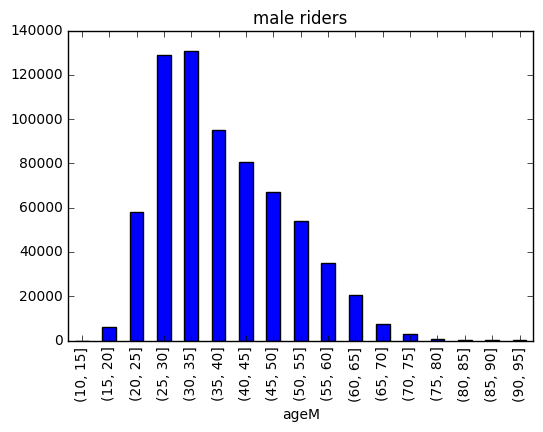

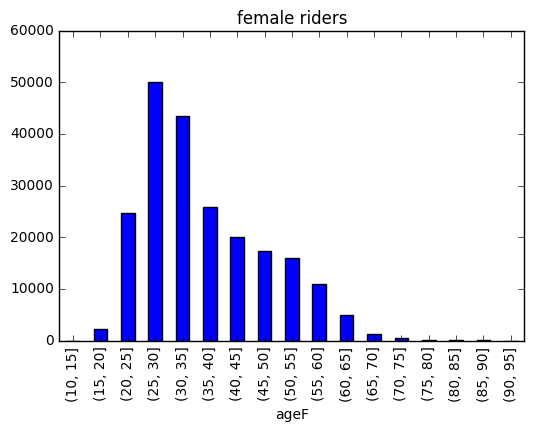

In [10]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")


# Figure 1: histogrammed distribution of riders' ages by gender

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.000753
(20, 25]       0.030148
(25, 30]       0.072902
(30, 35]       0.083129
(35, 40]       0.063430
(40, 45]       0.038023
(45, 50]       0.020374
(50, 55]       0.015348
(55, 60]       0.014436
(60, 65]       0.007441
(65, 70]       0.002506
(70, 75]       0.000079
(75, 80]       0.000315
(80, 85]       0.000004
(85, 90]       0.000004
(90, 95]       0.000000


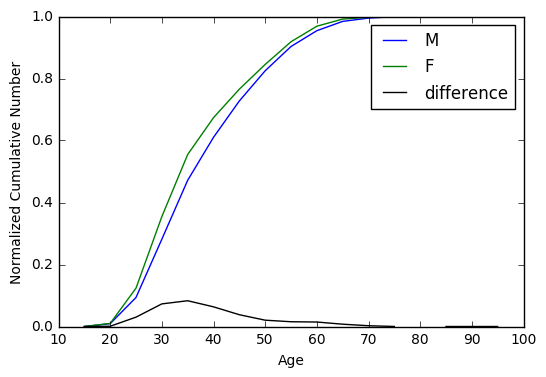

In [11]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

# Figure 2: the cumulative distribution of CitiBike riders' ages by gender

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [12]:
import scipy.stats

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html


In [20]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

Ks_2sampResult(statistic=0.11005115201581227, pvalue=0.0)


# FILL IN THE CELL BELOW!

## The  the p-value is much smaller than K-S statistic, so we can reject the Null hypothesis that age distribution is the same from the same distribution for man and woman.


The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

In [14]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="../plotsforclasses/ks2sample_table.png")

IOError: [Errno 2] No such file or directory: u'../plotsforclasses/ks2sample_table.png'

# Now redo the test with a subsample of the data: take only 1 ride every of 200 

In [24]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS
##Work with Yao Wang yw2278
subdf = df.loc[::200,:]

In [25]:
subdf.head()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
0,732,489,40.750664,-74.001768,368,40.730386,-74.002150,18669,1970.0,1,45.0,NaN
200,201,2010,40.721655,-74.002347,151,40.721816,-73.997203,16716,1967.0,1,48.0,NaN
400,3955,312,40.722055,-73.989111,312,40.722055,-73.989111,15660,NaN,0,NaN,NaN
600,488,488,40.756458,-73.993722,462,40.746920,-74.004519,18831,1976.0,1,39.0,NaN
800,524,327,40.715338,-74.016584,260,40.703652,-74.011678,16526,1976.0,1,39.0,NaN


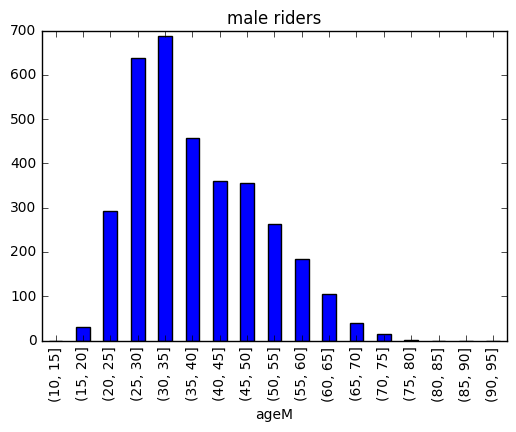

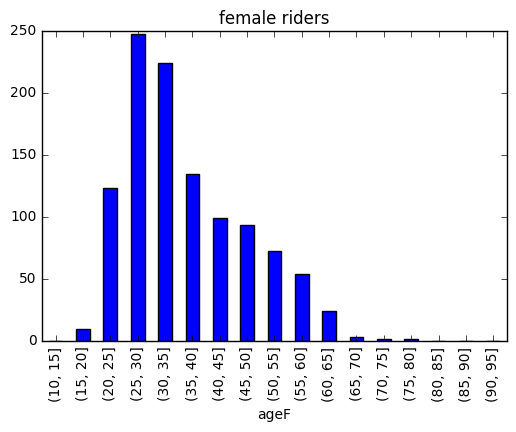

In [26]:
bins = np.arange(10, 99, 5)
axM = subdf.ageM.groupby(pd.cut(subdf.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = subdf.ageF.groupby(pd.cut(subdf.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")

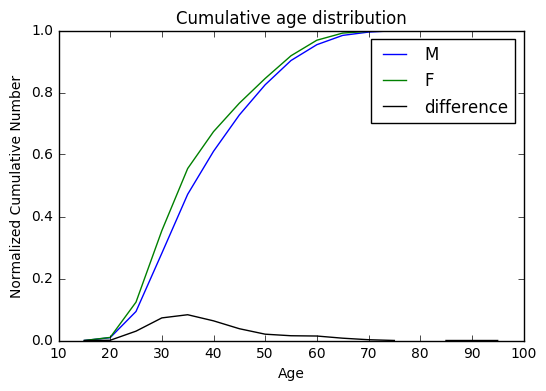

In [27]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()


pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.title("Cumulative age distribution")
pl.legend()

In [22]:
subdf['ageM'].dropna(inplace= True)
subdf['ageF'].dropna(inplace= True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/series.py:2571: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [30]:
ks = scipy.stats.ks_2samp(subdf.ageM[~np.isnan(subdf.ageM)] , subdf.ageF[~np.isnan(subdf.ageF)] )
print (ks)

Ks_2sampResult(statistic=0.10426830055931392, pvalue=2.8617252905297315e-08)


# Pearson's  test for correlation

## notice that the Pearson's is a pairwise test: the samples need to be 
## a. sorted and 
## b. the same size!

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [ ]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis



### H$0$: There is no correlation between the age distribution by gender

### H$a$: There is correlation between the age distibution by gender

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [ ]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis

bins = np.arange(10, 99, 1) 

In [33]:
Mdis = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero])
Fdis = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero])

Mtol = Mdis.sum()
Ftol = Fdis.sum()

Mdis = list(Mdis.count_nonzero) 
Fdis = list(Fdis.count_nonzero) 

Mdis = Mdis / np.sum(Mdis)
Fdis = Fdis / np.sum(Fdis)

scipy.stats.pearsonr(Mdis,Fdis)

(0.97624666815588979, 2.2521338144357942e-11)

## please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??

#### The scipy.stats.pearsonr returns two values. The first (0.976) is the correlation, indicates there is a strong positive correlation between the age distribution of male and female.  The second one (2.25e-11)is the p-value,  indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets.
 

## EXTRA CREDIT:  CHOOSE ONE OF THE TESTS, AND TEST THE CORRELATION OF AGES  OF RIDERS DURING THE DAY VS DURING THE NIGHT!



## H$0$: There is no correlation of ages of riders during the day vs night time.

## H$a$: There is correlation of ages of riders during the day vs night time.

In [35]:
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992.0,1
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990.0,1
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988.0,1


In [36]:
df2['date'] = pd.to_datetime(df2['starttime'])
df2['age']=2015-df2['birth year'][(df2['usertype'] == 'Subscriber')]
df2['time'] = df2.date.apply(lambda x:x.time())


In [37]:
df2 = df2.dropna(subset=['birth year'])

In [41]:
data2=df2[["time","age"]]
data2.head()

,time,age
0,00:00:03,45.0
1,00:00:06,31.0
2,00:00:17,23.0
3,00:00:23,25.0
4,00:00:44,27.0


In [42]:
data2["timezone"] = data2.time.apply(lambda x: "day" if ((x > datetime.time(06,00,00)) & (x < datetime.time(18,00,00)) ) else "night")

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [43]:
data2.head()

,time,age,timezone
0,00:00:03,45.0,night
1,00:00:06,31.0,night
2,00:00:17,23.0,night
3,00:00:23,25.0,night
4,00:00:44,27.0,night


In [58]:
#Thanks Yao(yw2278)
daytime = data2[data2.timezone=="day"]
nitime = data2[data2.timezone=="night"]
bins = np.arange(10, 99, 1) 
dayage = np.array(daytime.age)
nitage = np.array(nitime.age)


601495
303816
1


In [61]:

indexD = np.random.permutation(50000)
indexN = np.random.permutation(50000)

dayage = sorted(dayage[indexD])
nitage = sorted(nitage[indexN])

In [62]:
scipy.stats.pearsonr(dayage,nitage)

(0.99494907379116382, 0.0)

### The p-value is small so we can reject the null hypothesis, so there is correlation of ages of riders during the day vs night time.